### Capítulo 3 - Medidas-Resumo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def tabela_frequencia(tabela, coluna): 
    '''
    Função que gera tabela de distribuição de frequências para a coluna de uma tabela desejada.
    '''
    if type(tabela[f'{coluna}'][0]) == str:
        freq_abs = tabela[f'{coluna}'].value_counts()
        freq_rel = tabela[f'{coluna}'].value_counts(normalize=True)*100
        freq_acum = freq_rel.cumsum()
        dist_freq = pd.DataFrame({'Frequência Absoluta': freq_abs, 'Frequência Relativa': round(freq_rel,2), 'Frequência Acumulada': round(freq_acum,2)})
        return dist_freq
    else:
        k = round(1 + np.log2(len(tabela[f'{coluna}']))) # número de classes
        lsup = tabela[f'{coluna}'].max() # limite superior
        linf = tabela[f'{coluna}'].min() # limite inferior
        amplitude = lsup - linf # amplitude
        intervalo = amplitude/k # intervalo
        classes = []
        for i in range(k):
            classes.append(round(linf + i*intervalo, 2))

        labels = []
        for i in range(len(classes)-1):
            labels.append(f'{classes[i]} a {classes[i+1]}')

        frequencia = pd.value_counts(pd.cut(x=tabela[f'{coluna}'], bins=classes, labels=labels, include_lowest=True), sort=False)
        percentual = pd.value_counts(pd.cut(x = tabela[f'{coluna}'],bins = classes, labels = labels,include_lowest = True), normalize = True, sort=False)*100
        freq_acum = percentual.cumsum()

        dist_freq = pd.DataFrame({'Frequência Absoluta': frequencia, 'Frequência Relativa': round(percentual,2), 'Frequência Acumulada': round(freq_acum,2)})
        return dist_freq

##### Questão 1) Com base na tabela do livro, responda:
- a) Qual a média de erros por página?
- b) Qual a mediana de erros por página?
- c) Qual o desvio padrão de erros por página?
- d) Fazer representação gráfica para a distribuição
- e) Se o livro tivesse  500 páginas, qual o total de erros esperados?

In [3]:
conjunto = [0]*25 + [1]*20 + [2]*3 + [3]*1 + [4]*1

- a) Média

In [4]:
np.mean(conjunto)

0.66

- b) Mediana

In [5]:
np.mean(conjunto)

0.66

- C) Desvio Padrão

In [6]:
np.std(conjunto)

0.8392854103342915

- d) Gráfico

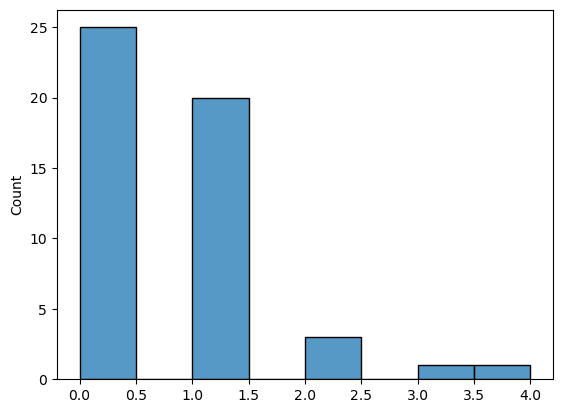

In [7]:
sns.histplot(conjunto)
plt.show()

##### Questão 2) Através do conjunto de taxas, calcular média, mediana e desvio padrão

In [8]:
juros = [2.59, 2.64, 2.60, 2.62, 2.57, 2.55, 2.61, 2.50, 2.63, 2.64]

In [9]:
print(f'Média = {np.mean(juros)}')
print(f'Mediana = {np.median(juros)}')
print(f'Desvio-padrão = {np.std(juros)}')

Média = 2.5949999999999998
Mediana = 2.605
Desvio-padrão = 0.042249260348555265


##### Questão 3) Através do conjunto, a) construir histograma com 5 intervalos e b) determinar uma medida de posição central e uma de dispersão

In [10]:
casas = [2, 2, 3, 10, 13, 14, 15, 15, 16, 16,
        18, 18, 20, 21, 22, 22, 23, 24, 25, 25,
        26, 27, 29, 29, 30, 32, 36, 42, 44, 45,
        45, 46, 48, 52, 58, 59, 61, 61, 61, 65,
        66, 66, 68, 75, 78, 80, 89, 90, 92, 97]

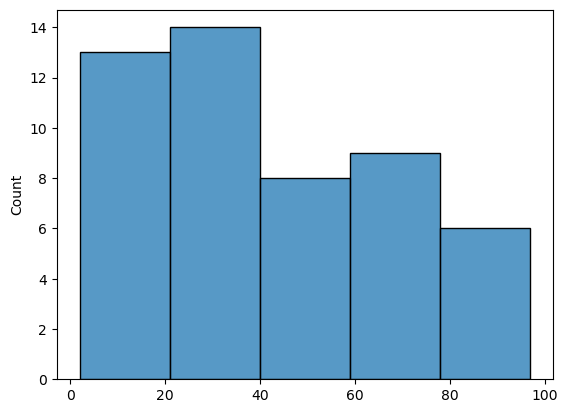

In [11]:
sns.histplot(casas, bins=5)
plt.show()

In [12]:
print(np.mean(casas))
print(np.std(casas))

40.42
25.814794207973073


##### Questão  6) Através do conjunto de filhos por familia, responda:
- a) Qual a mediana?
- b) qual a moda?
- c) Qual a média?

In [13]:
filhos = [0]*17 + [1]*20 + [2]*28 + [3]*19 + [4]*7 + [5]*5

In [14]:
np.mean(filhos)

1.9375

#### 7) Obtenha o esquema dos cinco números para os dados do Problema 3. Calcule o intervalo interquartil e as dispersões inferior e superior. Baseado nessas medidas, verifique se a forma da distribuição dos dados é normal.
 x(1), q1, q2 , q3 e x(n)

In [15]:
casas = [2, 2, 3, 10, 13, 14, 15, 15, 16, 16,
        18, 18, 20, 21, 22, 22, 23, 24, 25, 25,
        26, 27, 29, 29, 30, 32, 36, 42, 44, 45,
        45, 46, 48, 52, 58, 59, 61, 61, 61, 65,
        66, 66, 68, 75, 78, 80, 89, 90, 92, 97]

In [16]:
x0 = casas[0]
print(f'x(1): {x0}')
q1 = np.quantile(casas, 0.25)
print(f'Q1: {q1}')
q2 = np.quantile(casas, 0.5)
print(f'Q2: {q2}')
q3 = np.quantile(casas, 0.75)
print(f'Q3: {q3}')
xn = casas[-1]
print(f'x(n): {xn}')

print(f'Distância interquartil: {q3 - q1}')
print(f'Dispersão inferior: {q1-x0}')
print(f'Dispersão superior: {xn-q3}')

print('não é normal!')


x(1): 2
Q1: 20.25
Q2: 31.0
Q3: 61.0
x(n): 97
Distância interquartil: 40.75
Dispersão inferior: 18.25
Dispersão superior: 36.0
não é normal!


#### 8)Refaça o problema anterior, utilizando desta vez os dados do Problema 5 do Capítulo 2.
Tabela 2.1
(a) Estado civil.
(b) Região de procedência.
(c) Número de filhos dos empregados casados.
(d) Idade.

In [17]:
tabela21 = pd.read_excel('dados/Dados_EB.xls', sheet_name='Tabela 2.1')
tabela21.rename(columns=tabela21.iloc[0],inplace=True)
tabela21.drop(tabela21.index[0], inplace=True)
tabela21 = tabela21.reset_index(drop=True)

In [18]:
for coluna in tabela21[['Estado Civil', 'Região de Procedência', 'Anos']]:
    print(coluna)

Estado Civil
Região de Procedência
Anos


In [19]:
x0 = sorted(juros)[0]
print(f'x(1): {x0}')
q1 = np.quantile(sorted(juros), 0.25)
print(f'Q1: {q1}')
q2 = np.quantile(sorted(juros), 0.5)
print(f'Q2: {q2}')
q3 = np.quantile(sorted(juros), 0.75)
print(f'Q3: {q3}')
xn = sorted(juros)[-1]
print(f'x(n): {xn}')

print(f'Distância interquartil: {q3 - q1}')
print(f'Dispersão inferior: {q1-x0}')
print(f'Dispersão superior: {xn-q3}')

print('não é normal!')


x(1): 2.5
Q1: 2.5749999999999997
Q2: 2.605
Q3: 2.6275
x(n): 2.64
Distância interquartil: 0.05250000000000021
Dispersão inferior: 0.07499999999999973
Dispersão superior: 0.012500000000000178
não é normal!


##### 9) Obter os três quartis, q(0,1) e q(0,90) para os dados do Problema 3.

In [21]:
casas = [2, 2, 3, 10, 13, 14, 15, 15, 16, 16,
        18, 18, 20, 21, 22, 22, 23, 24, 25, 25,
        26, 27, 29, 29, 30, 32, 36, 42, 44, 45,
        45, 46, 48, 52, 58, 59, 61, 61, 61, 65,
        66, 66, 68, 75, 78, 80, 89, 90, 92, 97]

In [24]:
d1 = np.quantile(sorted(casas), 0.1)
print(f'D1: {d1}')
q1 = np.quantile(sorted(casas), 0.25)
print(f'Q1: {q1}')
q2 = np.quantile(sorted(casas), 0.5)
print(f'Q2: {q2}')
q3 = np.quantile(sorted(casas), 0.75)
print(f'Q3: {q3}')
d90 = np.quantile(sorted(casas), 0.90)
print(f'D90: {d90}')

D1: 13.9
Q1: 20.25
Q2: 31.0
Q3: 61.0
D90: 78.2


#### 10) Para a variável população urbana do CD-Brasil, obtenha q(0,10), q(0,25), q(0,50), q(0,75), q(0,80) e q(0,95)

In [25]:
def typecast_float(value):
    try:
        return float(value.replace(',', ''))
    except:
        return value

CDBrasil = pd.read_excel('dados/Dados_EB.xls', sheet_name='CD-Brasil', converters={'Unnamed: 2': typecast_float, 'Unnamed: 3': typecast_float}) 

CDBrasil.rename(columns=CDBrasil.iloc[3],inplace=True)
CDBrasil.drop(CDBrasil.index[0:4], inplace=True)
CDBrasil = CDBrasil.reset_index(drop=True)
CDBrasil.columns.values[0] = 'Região'
CDBrasil.columns.values[1] = 'Estado'
CDBrasil['Região'] = CDBrasil['Região'].astype(str)
# preencher valores vazios com o valor da célula acima

for i in range(0, len(CDBrasil)):
    if CDBrasil.iloc[i,0] == 'nan':
        CDBrasil.iloc[i,0] = CDBrasil.iloc[i-1,0]
    else:
        continue

In [29]:
d1 = np.quantile(sorted(CDBrasil['População']), 0.1)
print(f'D1: {d1}')
q1 = np.quantile(sorted(CDBrasil['População']), 0.25)
print(f'Q1: {q1}')
q2 = np.quantile(sorted(CDBrasil['População']), 0.5)
print(f'Q2: {q2}')
q3 = np.quantile(sorted(CDBrasil['População']), 0.75)
print(f'Q3: {q3}')
d80 = np.quantile(sorted(CDBrasil['População']), 0.80)
print(f'D90: {d80}')
d95 = np.quantile(sorted(CDBrasil['População']), 0.95)
print(f'D90: {d95}')

D1: 1285652.8
Q1: 2854642.0
Q2: 5866487.0
Q3: 14080670.0
D90: 15100796.8
D90: 62070805.99999996


#### 11. Construa o box plot para os dados do Exemplo 2.3, Capítulo 2. O que você pode concluir a respeito da distribuição?

In [4]:
tabela21 = pd.read_excel('dados/Dados_EB.xls', sheet_name='Tabela 2.1')

tabela21.rename(columns=tabela21.iloc[0],inplace=True)
tabela21.drop(tabela21.index[0], inplace=True)
tabela21 = tabela21.reset_index(drop=True)

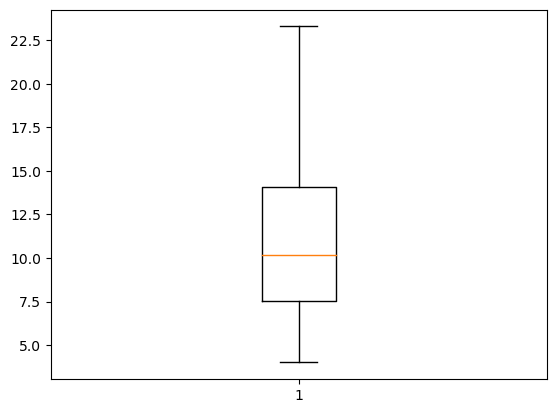

In [12]:
#boxplot vertical
plt.boxplot(tabela21['Salario (x Sal Min)'], vert=True)
plt.show()

#### 12) Refaça a questão anterior com os dados do Problema 3 deste capítulo.


In [13]:
casas = [2, 2, 3, 10, 13, 14, 15, 15, 16, 16,
        18, 18, 20, 21, 22, 22, 23, 24, 25, 25,
        26, 27, 29, 29, 30, 32, 36, 42, 44, 45,
        45, 46, 48, 52, 58, 59, 61, 61, 61, 65,
        66, 66, 68, 75, 78, 80, 89, 90, 92, 97]

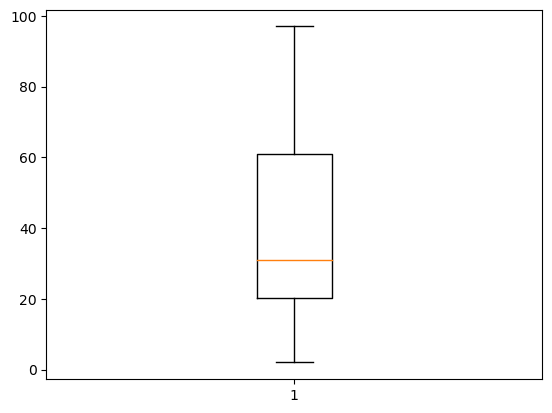

In [14]:
#boxplot vertical
plt.boxplot(casas, vert=True)
plt.show()

#### 13. Faça um box plot para o Problema 10. Comente sobre a simetria, caudas e presença de valores atípicos.

In [15]:
def typecast_float(value):
    try:
        return float(value.replace(',', ''))
    except:
        return value

CDBrasil = pd.read_excel('dados/Dados_EB.xls', sheet_name='CD-Brasil', converters={'Unnamed: 2': typecast_float, 'Unnamed: 3': typecast_float}) 

CDBrasil.rename(columns=CDBrasil.iloc[3],inplace=True)
CDBrasil.drop(CDBrasil.index[0:4], inplace=True)
CDBrasil = CDBrasil.reset_index(drop=True)
CDBrasil.columns.values[0] = 'Região'
CDBrasil.columns.values[1] = 'Estado'
CDBrasil['Região'] = CDBrasil['Região'].astype(str)
# preencher valores vazios com o valor da célula acima

for i in range(0, len(CDBrasil)):
    if CDBrasil.iloc[i,0] == 'nan':
        CDBrasil.iloc[i,0] = CDBrasil.iloc[i-1,0]
    else:
        continue

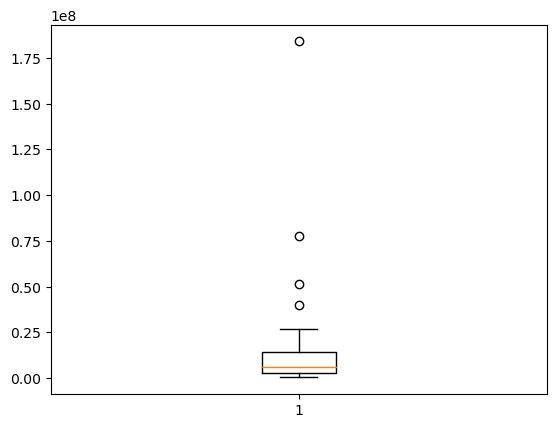

In [23]:
plt.boxplot(CDBrasil['População'], vert=True)
plt.show()